
<img src="https://bloqueneon.uniandes.edu.co/content/enforced/52233-202120_ISIS4219_01/Laboratorios.png?_&d2lSessionVal=guLBE9l4cI9Tip6PM5JSzKgp6" ><br>
# Machine Learning Techniques - ISIS4219

Segundo Semestre - 2021




## Integrantes

*   Juan Carlos Martínez Rey
*   Juan Camilo Useche Rodríguez


## **Problema**

Las enfermedades cardiovasculares son la principal causa de muerte en el mundo, y se calcula que cobran 17,9 millones de vidas al año (OMS). La enfermedad de las arterias coronarias es el tipo más común de enfermedad cardíaca y se produce debido a las obstrucciones (placa) desarrolladas en el interior de las arterias coronarias (vasos sanguíneos que alimentan los músculos del corazón). Los cardiólogos utilizan diversas técnicas de imagen y mediciones invasivas de la presión arterial para examinar y controlar la gravedad de dichas obstrucciones. <br>
Los factores de riesgo conductuales más importantes de estas enfermedades son una dieta poco saludable, la inactividad física, el consumo de tabaco y el uso nocivo del alcohol. Los efectos de los factores de riesgo pueden manifestarse en las personas en forma de aumento de la presión arterial, aumento de la glucosa en sangre, aumento de los lípidos en sangre y sobrepeso y obesidad.
Identificar a las personas con mayor riesgo de sufrir enfermedades cardiovasculares y garantizar que reciban el tratamiento adecuado puede evitar muertes prematuras. Con este objetivo en mente, se quiere utilizar las técnicas de machine learning para construir un modelo que permita predecir qué pacientes pueden estar en riesgo de padecer este tipo de cardiopatía.<br><br>
Referencias. <br>
OMS (s.f.). “Cardiovascular diseases”. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
<br><br>
**Fuente de Datos**: https://www.kaggle.com/agsam23/coronary-artery-disease/version/3


### Librerías

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install plotly==4.5.2

## **1.   Import de librerías requeridas**




Se importó la librería pandas profiling para la visualización y perfilamiento de los datos. Por otro lado, se usó scikit-learn para la preparación de datos, entrenamiento y evaluación del modelo.


In [ ]:
#Data management Libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

# **2. Perfilamiento**

#### **Lectura y entendimiento de datos**

Archivos:

1.   **Coronary_artery.csv:** incluye los datos originales disponibles de la fuente que se pueden utilizar para visualización y comprensión.
2.   **data.csv:** este es un archivo codificado por etiquetas que se puede utilizar para el desarrollo de modelos

Se leen los datos y se verifica que se hayan importado correctamente.


In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Draka/ISIS-4219-Lab-1/main/Coronary_artery.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Draka/ISIS-4219-Lab-1/main/data.csv')

In [ ]:
df1.head()

age     sex               cp  ...  ca               thal  class
0   63    Male   Typical Angina  ...   0              Fixed      0
1   67    Male     Asymptomatic  ...   3             Normal      2
2   67    Male     Asymptomatic  ...   2  Reversible defect      1
3   37    Male  Nonanginal pain  ...   0             Normal      0
4   41  Female  Atypical Angina  ...   0             Normal      0

[5 rows x 14 columns]

Revisamos los tipos de valores que toman los datos, la cantidad de nulos y que no haya entradas con valores imposibles

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    bool   
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 30.6+ KB


In [ ]:
df1.describe()

age    trestbps        chol  ...     oldpeak          ca       class
count  297.000000  297.000000  297.000000  ...  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  ...    1.055556    0.676768    0.946128
std      9.049736   17.762806   51.997583  ...    1.166123    0.938965    1.234551
min     29.000000   94.000000  126.000000  ...    0.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  ...    0.000000    0.000000    0.000000
50%     56.000000  130.000000  243.000000  ...    0.800000    0.000000    0.000000
75%     61.000000  140.000000  276.000000  ...    1.600000    1.000000    2.000000
max     77.000000  200.000000  564.000000  ...    6.200000    3.000000    4.000000

[8 rows x 7 columns]

In [ ]:
df2.head()

Unnamed: 0   age  sex   cp  trestbps  ...  oldpeak  slope   ca  thal  class
0           0  63.0  1.0  1.0     145.0  ...      2.3    3.0  0.0   6.0      0
1           1  67.0  1.0  4.0     160.0  ...      1.5    2.0  3.0   3.0      2
2           2  67.0  1.0  4.0     120.0  ...      2.6    2.0  2.0   7.0      1
3           3  37.0  1.0  3.0     130.0  ...      3.5    3.0  0.0   3.0      0
4           4  41.0  0.0  2.0     130.0  ...      1.4    1.0  0.0   3.0      0

[5 rows x 15 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    float64
 2   sex         303 non-null    float64
 3   cp          303 non-null    float64
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    float64
 7   restecg     303 non-null    float64
 8   thalach     303 non-null    float64
 9   exang       303 non-null    float64
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    float64
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  class       303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [ ]:
df2 = df2[~df2.isin(['?'])]
df2 = df2.dropna(axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   age         297 non-null    float64
 2   sex         297 non-null    float64
 3   cp          297 non-null    float64
 4   trestbps    297 non-null    float64
 5   chol        297 non-null    float64
 6   fbs         297 non-null    float64
 7   restecg     297 non-null    float64
 8   thalach     297 non-null    float64
 9   exang       297 non-null    float64
 10  oldpeak     297 non-null    float64
 11  slope       297 non-null    float64
 12  ca          297 non-null    object 
 13  thal        297 non-null    object 
 14  class       297 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 37.1+ KB


In [ ]:
df2["ca"] = pd.to_numeric(df2["ca"])
df2["thal"] = pd.to_numeric(df2["thal"])

Eliminando las filas que tienen un "?"

Usamos pandas profiling para obtener un reporte de los datos y continuar su analisis

In [ ]:
ProfileReport(df1)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Encontramos que hay mujeres con un colestero muy elevado pero luego de investigarlo esto es posible debido a una condición genética. Por otro lado, eliminamos la columna unnamed ya que no aporta nada al entendimiento de los datos.

In [ ]:
df2 = df2.drop(['Unnamed: 0'],axis=1)

Observamos la correlación entre los datos

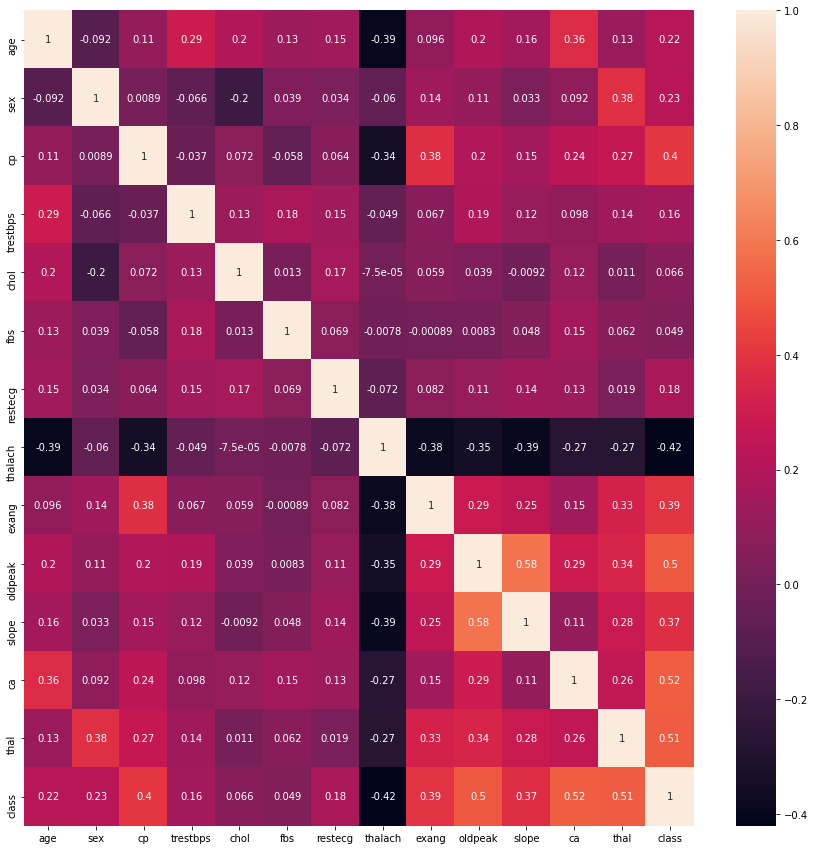

In [ ]:
correlation_mat = df2.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation_mat, annot = True)
plt.show(ax)

Realizamos algunos graficos adicionales para continuar el entendimiento de los datos.

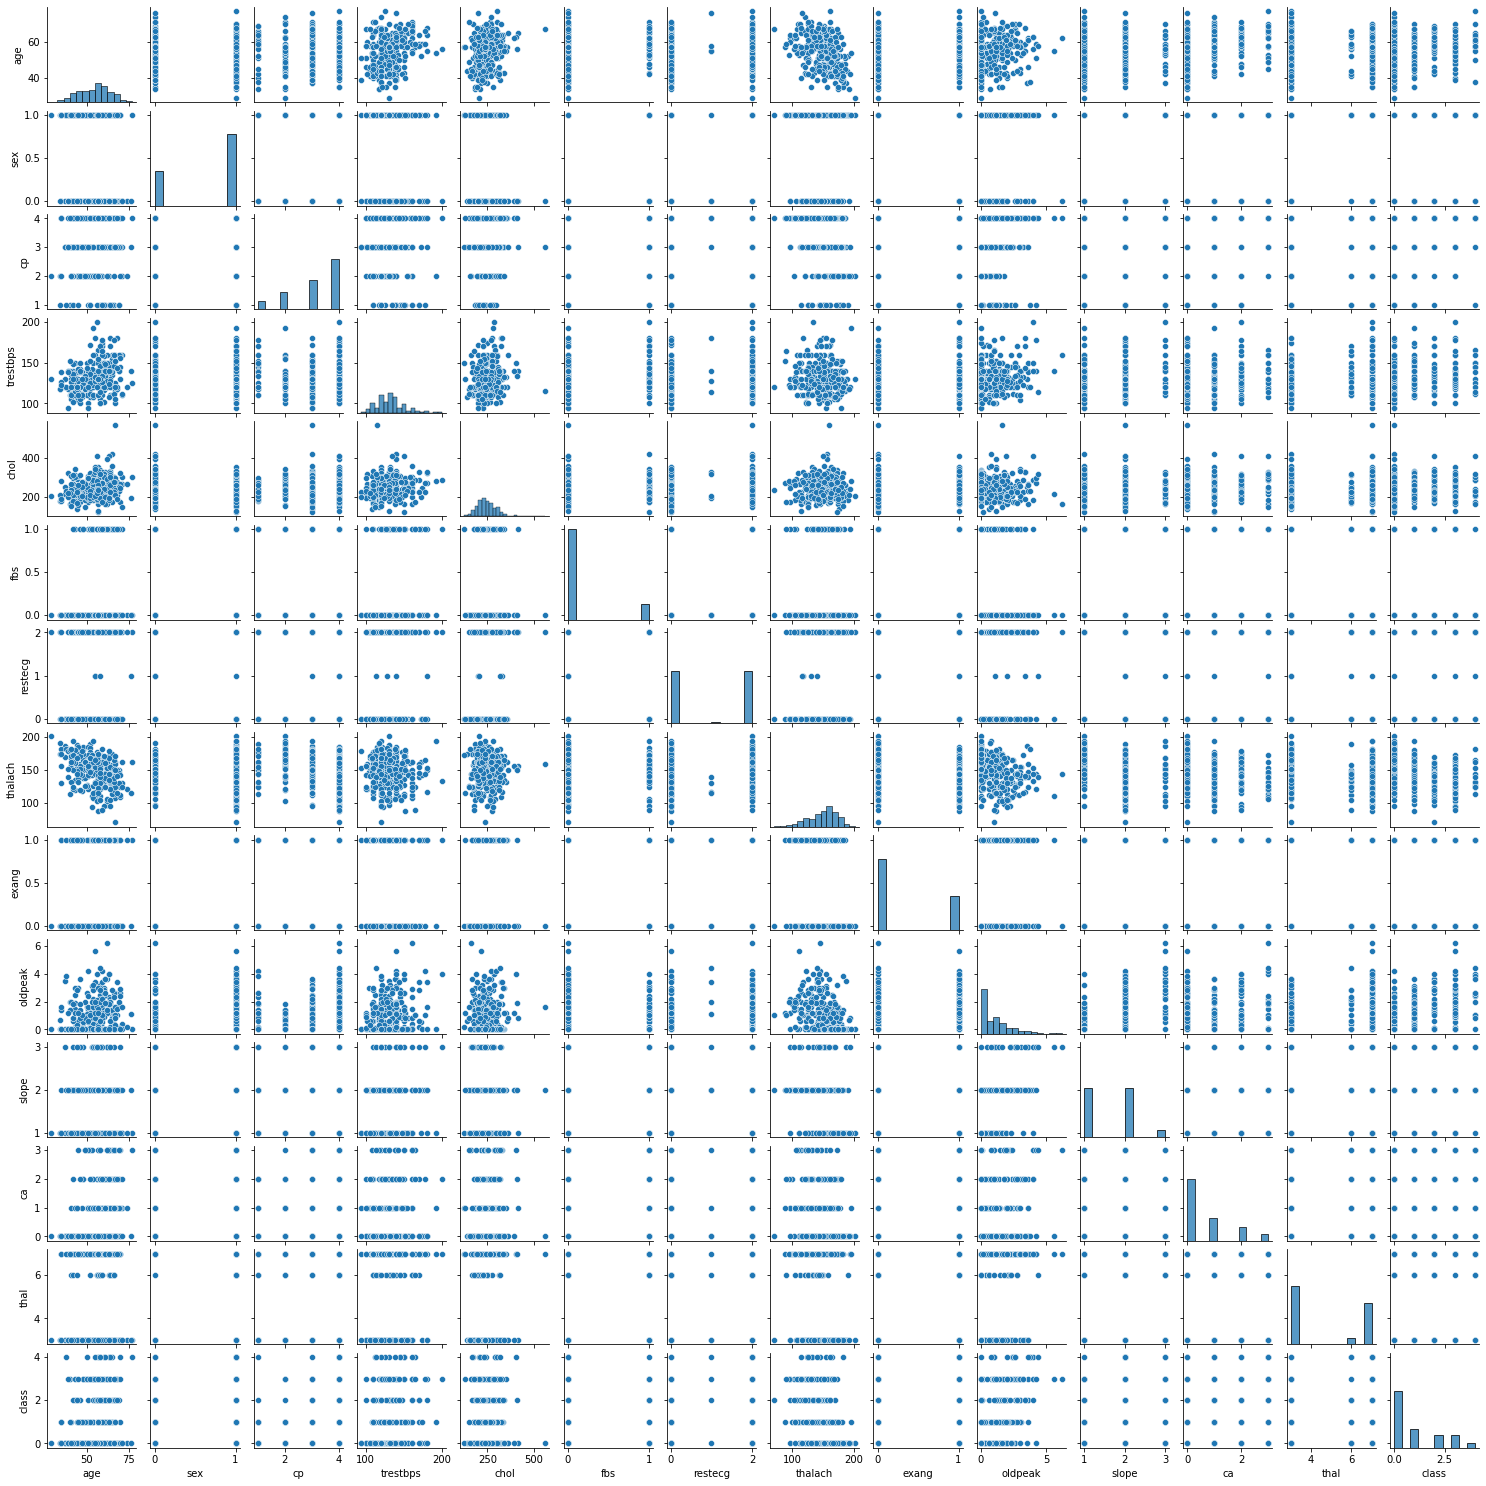

In [ ]:
sns.pairplot(df2, height = 1.5, palette = 'rocket')

In [ ]:
import plotly.express as px
fig = px.sunburst(data_frame = df1,
                 path = [ 'sex','class','cp'],
                 color = 'class',
                 maxdepth = -1,
                 title = 'Sunburst Chart SmokingStatus > Gender > Age')
fig.update_traces(textinfo = 'label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

## **3. Limpieza y Preparación de Datos**
Hicimos la separación de datos (entrenamiento/test) en preparación para la construcción del modelo


In [ ]:
train, test = train_test_split(df2, test_size=0.2, random_state=42)
train = train
test = test
train.head()

age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  class
277  39.0  0.0  3.0     138.0  220.0  ...      0.0    2.0  0.0   3.0      0
262  60.0  0.0  1.0     150.0  240.0  ...      0.9    1.0  0.0   3.0      0
30   69.0  0.0  1.0     140.0  239.0  ...      1.8    1.0  2.0   3.0      0
22   58.0  1.0  2.0     120.0  284.0  ...      1.8    2.0  0.0   3.0      1
281  47.0  1.0  3.0     130.0  253.0  ...      0.0    1.0  0.0   3.0      0

[5 rows x 14 columns]

In [ ]:
test.head()

age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  class
169  45.0  0.0  2.0     112.0  160.0  ...      0.0    2.0  0.0   3.0      0
214  52.0  1.0  4.0     112.0  230.0  ...      0.0    1.0  1.0   3.0      1
63   54.0  0.0  3.0     135.0  304.0  ...      0.0    1.0  0.0   3.0      0
155  70.0  1.0  4.0     130.0  322.0  ...      2.4    2.0  3.0   3.0      1
5    56.0  1.0  2.0     120.0  236.0  ...      0.8    1.0  0.0   3.0      0

[5 rows x 14 columns]

Realizamos un analisis de correlación adicional sobre los datos de entrenamiento para observar como se comportaban

In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

Encontramos que una forma de seleccionar las variables de interes es mediante un analisis del modelo de regresión lineal generalizado

In [ ]:
#toca renombrar el nombre de la columna class genera error
df_new = df2.rename(columns={'class': 'label'})
formula = 'label ~ age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal'
result = smf.glm(formula = formula, data=df_new).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                  297
Model:                            GLM   Df Residuals:                      283
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.68817
Method:                          IRLS   Log-Likelihood:                -358.76
Date:                Sat, 11 Sep 2021   Deviance:                       194.75
Time:                        18:04:42   Pearson chi2:                     195.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6748      0.764     -0.884      0.3

Se selecciona las columnas que tienen p<0.05

In [ ]:
train

age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  class
277  39.0  0.0  3.0     138.0  220.0  ...      0.0    2.0  0.0   3.0      0
262  60.0  0.0  1.0     150.0  240.0  ...      0.9    1.0  0.0   3.0      0
30   69.0  0.0  1.0     140.0  239.0  ...      1.8    1.0  2.0   3.0      0
22   58.0  1.0  2.0     120.0  284.0  ...      1.8    2.0  0.0   3.0      1
281  47.0  1.0  3.0     130.0  253.0  ...      0.0    1.0  0.0   3.0      0
..    ...  ...  ...       ...    ...  ...      ...    ...  ...   ...    ...
190  50.0  1.0  3.0     129.0  196.0  ...      0.0    1.0  0.0   3.0      0
71   67.0  1.0  4.0     125.0  254.0  ...      0.2    2.0  2.0   7.0      3
107  57.0  1.0  3.0     128.0  229.0  ...      0.4    2.0  1.0   7.0      1
274  59.0  1.0  1.0     134.0  204.0  ...      0.8    1.0  2.0   3.0      1
103  71.0  0.0  3.0     110.0  265.0  ...      0.0    1.0  1.0   3.0      0

[237 rows x 14 columns]

Además, separamos nuestra variable objetivo "class" de las demas variables que utilizaremos para la construcción del modelo

In [ ]:
X = train[['cp', 'restecg', 'oldpeak', 'slope', 'ca', 'thal']]
Y = train['class']
X

cp  restecg  oldpeak  slope   ca  thal
277  3.0      0.0      0.0    2.0  0.0   3.0
262  1.0      0.0      0.9    1.0  0.0   3.0
30   1.0      0.0      1.8    1.0  2.0   3.0
22   2.0      2.0      1.8    2.0  0.0   3.0
281  3.0      0.0      0.0    1.0  0.0   3.0
..   ...      ...      ...    ...  ...   ...
190  3.0      0.0      0.0    1.0  0.0   3.0
71   4.0      0.0      0.2    2.0  2.0   7.0
107  3.0      2.0      0.4    2.0  1.0   7.0
274  1.0      0.0      0.8    1.0  2.0   3.0
103  3.0      2.0      0.0    1.0  1.0   3.0

[237 rows x 6 columns]

In [ ]:
Y

277    0
262    0
30     0
22     1
281    0
      ..
190    0
71     3
107    1
274    1
103    0
Name: class, Length: 237, dtype: int64

## **4. Modelamiento**
Para empezar vamos a entrenar un modelo con una regresión lineal y otro con una polinomial,  observaremos su compartamiento

### **4.1 Entrenamiento**
#### **Regresión Lineal**

In [ ]:
LinearModel = LinearRegression().fit(X, Y)
print ('Coefficients: ', LinearModel.coef_)
print ('Intercept: ',LinearModel.intercept_)

Coefficients:  [0.25430723 0.14161219 0.21467621 0.19485687 0.43941388 0.16110921]
Intercept:  -1.6015101558803813


In [ ]:
list(zip(X, LinearModel.coef_))

[('cp', 0.25430723437805347),
 ('restecg', 0.14161218935849318),
 ('oldpeak', 0.21467620926296715),
 ('slope', 0.19485687145911273),
 ('ca', 0.4394138813077292),
 ('thal', 0.16110921425300873)]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 277 to 103
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       237 non-null    float64
 1   restecg  237 non-null    float64
 2   oldpeak  237 non-null    float64
 3   slope    237 non-null    float64
 4   ca       237 non-null    float64
 5   thal     237 non-null    float64
dtypes: float64(6)
memory usage: 13.0 KB


#### **Regresión Polinomial**

In [ ]:
import itertools

columns = X.columns
k = 2 #Grado a evaluar
X_train_pol = pd.concat([X**(i+1) for i in range(k)],axis=1) #Polinomios sin interacciones
X_train_pol.columns = np.reshape([[i+' '+str(j+1) for i in columns] for j in range(k)],-1)
temp = pd.concat([X[i[0]]*X[i[1]] for i in list(itertools.combinations(columns, 2))],axis=1) #Combinaciones sólo de grado 1
temp.columns = [' '.join(i) for i in list(itertools.combinations(columns, 2))]
X_train_pol = pd.concat([X_train_pol,temp],axis=1)


PolyModel = LinearRegression().fit(X_train_pol, Y)
print ('Coefficients: ', PolyModel.coef_)
print ('Intercept: ',PolyModel.intercept_)

Coefficients:  [-0.95418565  0.91044511  0.19945863 -0.17364613  0.35011556 -0.91276788
  0.12031678 -0.47371368  0.06889076 -0.16083897 -0.10264678  0.07750437
  0.04537067 -0.05115532  0.17930822  0.07388914  0.04968916 -0.01227072
 -0.08312836  0.14280569  0.01636088  0.00618288 -0.03359462 -0.0136127
  0.08423168  0.10085772 -0.04131019]
Intercept:  2.737334813363023


In [ ]:
list(zip(X_train_pol.columns, PolyModel.coef_))

[('cp 1', -0.9541856481097878),
 ('restecg 1', 0.9104451075182558),
 ('oldpeak 1', 0.19945862987331794),
 ('slope 1', -0.17364613134711446),
 ('ca 1', 0.3501155570932224),
 ('thal 1', -0.912767884851009),
 ('cp 2', 0.12031678446880671),
 ('restecg 2', -0.4737136790909921),
 ('oldpeak 2', 0.06889075524429777),
 ('slope 2', -0.1608389707906397),
 ('ca 2', -0.10264677812093097),
 ('thal 2', 0.07750436760113852),
 ('cp restecg', 0.04537066711331735),
 ('cp oldpeak', -0.05115531503280671),
 ('cp slope', 0.17930822057160753),
 ('cp ca', 0.07388914392326895),
 ('cp thal', 0.04968916123688213),
 ('restecg oldpeak', -0.012270721328332498),
 ('restecg slope', -0.08312835568631044),
 ('restecg ca', 0.1428056910338303),
 ('restecg thal', 0.016360881740627303),
 ('oldpeak slope', 0.0061828762737727375),
 ('oldpeak ca', -0.03359461865898053),
 ('oldpeak thal', -0.013612695347180681),
 ('slope ca', 0.08423167890959432),
 ('slope thal', 0.10085771865318573),
 ('ca thal', -0.041310191822930276)]

### **4.2 Predicción**

Ya entrenado el modelo podemos realizar una predicción sobre los datos de prueba para empezar a evaluar la calidad del modelo



In [ ]:
X_test = test[['cp', 'restecg', 'oldpeak', 'slope', 'ca', 'thal']]
Y_test = test['class']
X_test.head()

cp  restecg  oldpeak  slope   ca  thal
169  2.0      0.0      0.0    2.0  0.0   3.0
214  4.0      0.0      0.0    1.0  1.0   3.0
63   3.0      0.0      0.0    1.0  0.0   3.0
155  4.0      2.0      2.4    2.0  3.0   3.0
5    2.0      0.0      0.8    1.0  0.0   3.0

#### **Lineal**

In [ ]:
y_prediction_lineal = LinearModel.predict(X_test)
y_prediction_lineal

array([-0.2198543 ,  0.53331718, -0.16040394,  2.40544909, -0.24297021,
        0.88424864,  0.46411659,  1.13812301,  2.07677452, -0.41471117,
        1.13385514,  0.10630532,  0.16325866,  0.81654156,  0.54998707,
       -0.26443783,  0.51295006,  1.04053513,  1.42948212,  0.27900994,
        1.83184412,  1.93821857,  1.19080848, -0.03159821,  1.94357551,
       -0.41471117,  1.94554611,  1.1933055 ,  0.35151475, -0.41471117,
        0.29239049, -0.16040394,  2.61047207,  0.12282044,  0.22270902,
        0.29456141,  1.19080848, -0.37177593,  4.06051242,  1.86808881,
        0.39444999,  1.97370429,  1.75476021,  0.35416655, -0.17856734,
        0.98604492,  0.19644368,  1.58171499,  0.68689474,  0.1921758 ,
        0.12282044,  2.5419239 ,  0.37712767,  0.41756589,  1.6440209 ,
        0.97613227,  0.37793487,  0.27900994,  2.41850353,  1.54999665])

#### **Polinomial**

In [ ]:
X_test_pol = pd.concat([X_test**(i+1) for i in range(k)],axis=1) #Polinomios sin interacciones
X_test_pol.columns = np.reshape([[i+' '+str(j+1) for i in columns] for j in range(k)],-1)
temp = pd.concat([X_test[i[0]]*X_test[i[1]] for i in list(itertools.combinations(columns, 2))],axis=1) #Combinaciones sólo de grado 1
temp.columns = [' '.join(i) for i in list(itertools.combinations(columns, 2))]
X_test_pol = pd.concat([X_test_pol,temp],axis=1)

y_prediction_poly = PolyModel.predict(X_test_pol)
y_prediction_poly

array([-1.00667675e-01,  5.89813755e-01, -1.29920250e-01,  2.52371700e+00,
       -1.16099133e-02,  8.00102846e-01,  4.00108556e-01,  5.75263101e-01,
        2.29786355e+00, -1.05694229e-01,  9.96360381e-01, -2.15915166e-01,
        8.97274064e-02,  1.09633455e+00,  4.09252497e-01, -2.81928056e-02,
        3.14666901e-01,  1.47430160e+00,  1.05904005e+00,  2.99517064e-01,
        1.11235864e+00,  1.82838840e+00,  1.49462158e+00, -9.83170933e-02,
        2.64038925e+00, -1.05694229e-01,  1.93324684e+00,  1.03488642e+00,
        1.37908577e-01, -1.05694229e-01, -2.59942482e-02, -1.29920250e-01,
        2.86247682e+00,  2.47830202e-04,  8.73972651e-02,  3.37747394e-02,
        1.49462158e+00, -9.04400405e-02,  5.08974738e+00,  1.70480905e+00,
        1.65768201e-01,  2.12283766e+00,  1.97185019e+00,  8.87863924e-01,
        4.64056542e-02,  1.68283252e+00,  3.17062562e-01,  4.88595027e-01,
        5.05924117e-01, -1.76216434e-01,  2.47830202e-04,  2.40890516e+00,
        3.07396712e-01,  

In [ ]:
# Esto es para ver el error pero con el de entrenamiento
Y_lineal = LinearModel.predict(X)
Y_lineal

array([ 0.03445293, -0.47580982,  0.59622653,  0.44978725, -0.16040394,
        1.2471094 ,  1.43109761, -0.13148679,  1.74086468,  0.83800918,
        1.17775403,  3.14881087,  2.35286062,  0.11537092,  2.25692867,
        0.96170594,  0.22972568,  0.22972568, -0.16040394, -0.28590545,
        0.28876017,  1.1933055 ,  2.026701  ,  1.27667896,  2.19844196,
        0.183078  ,  0.85795829,  1.16027147,  1.04548763,  2.14117739,
        1.86886321,  1.6235318 ,  0.83411564,  1.03713392, -0.16040394,
        1.3542106 ,  1.11073923, -0.15709972,  0.80728729,  1.91771461,
        0.28876017, -0.13148679,  1.55400511,  0.26347334, -0.1174687 ,
        1.44106208,  2.65340731,  1.32375951,  1.90039229,  0.12282044,
        1.22607464,  0.50343638,  1.37591512,  0.37712767,  2.25692867,
        0.37712767,  2.53466305,  2.12812294,  2.73927779,  0.6647747 ,
        1.09091989,  2.36349237,  1.41554615,  1.63022236,  3.37137384,
        0.30792709,  1.02156453,  1.04798465,  0.26994435,  1.86

In [ ]:
# Esto es para ver el error pero con el de entrenamiento
X_pol = pd.concat([X**(i+1) for i in range(k)],axis=1) #Polinomios sin interacciones
X_pol.columns = np.reshape([[i+' '+str(j+1) for i in columns] for j in range(k)],-1)
temp = pd.concat([X[i[0]]*X[i[1]] for i in list(itertools.combinations(columns, 2))],axis=1) #Combinaciones sólo de grado 1
temp.columns = [' '.join(i) for i in list(itertools.combinations(columns, 2))]
X_pol = pd.concat([X_pol,temp],axis=1)

Y_poly = PolyModel.predict(X_pol)
Y_poly

array([ 5.44145237e-02,  3.17250168e-01,  8.24021867e-01,  7.51500090e-02,
       -1.29920250e-01,  1.23756324e+00,  1.64292511e+00, -6.62674825e-02,
        1.62992621e+00,  1.08722807e+00,  1.07213361e+00,  3.75254595e+00,
        2.78064847e+00,  8.31944208e-02,  2.52527276e+00,  6.17279416e-01,
        1.44353100e-01,  1.44353100e-01, -1.29920250e-01, -4.33978828e-02,
        4.50130292e-01,  1.03488642e+00,  2.05407874e+00,  1.53654493e+00,
        2.08417405e+00,  6.45800432e-02,  9.87094110e-01,  1.59146812e+00,
        1.19222912e+00,  2.40026723e+00,  1.66866819e+00,  1.85315295e+00,
        7.28888531e-01,  8.61944702e-01, -1.29920250e-01,  7.81197511e-01,
        6.48051593e-01,  6.84998069e-02,  1.01031198e+00,  1.11391062e+00,
        4.50130292e-01, -6.62674825e-02,  1.46167549e+00,  1.56927875e-01,
       -1.24897125e-01,  1.52951325e+00,  2.89540429e+00,  1.64757064e+00,
        2.12794497e+00,  2.47830202e-04,  1.35507224e+00,  4.85386083e-01,
        1.26965023e+00,  

### **4.3 Validación**
Ya que hicimos la predicción, podemos obtener metricas para evaluar la calidad del modelo.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('------------ Regresión Lineal Entrenamiento ------------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_lineal - Y)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_lineal , Y))
print("R2-score: %.2f" % r2_score(Y_lineal , Y) )

print('---------- Regresión Polinomial Entrenamiento ----------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_poly - Y)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(Y_poly , Y))
print("R2-score: %.2f" % r2_score(Y_poly , Y) )

------------ Regresión Lineal Entrenamiento ------------
Mean absolute error: 0.64
Residual sum of squares (MSE): 0.69
R2-score: 0.14
---------- Regresión Polinomial Entrenamiento ----------
Mean absolute error: 0.58
Residual sum of squares (MSE): 0.60
R2-score: 0.33


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('------------ Regresión Lineal Test ------------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction_lineal - Y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_prediction_lineal , Y_test))
print("R2-score: %.2f" % r2_score(y_prediction_lineal , Y_test) )

print('---------- Regresión Polinomial Test ----------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction_poly - Y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_prediction_poly , Y_test))
print("R2-score: %.2f" % r2_score(y_prediction_poly , Y_test) )

------------ Regresión Lineal Test ------------
Mean absolute error: 0.63
Residual sum of squares (MSE): 0.70
R2-score: 0.21
---------- Regresión Polinomial Test ----------
Mean absolute error: 0.58
Residual sum of squares (MSE): 0.71
R2-score: 0.35


Relizamos un gráfica para visualizar los resultados y  analizar el rendimiento del modelo



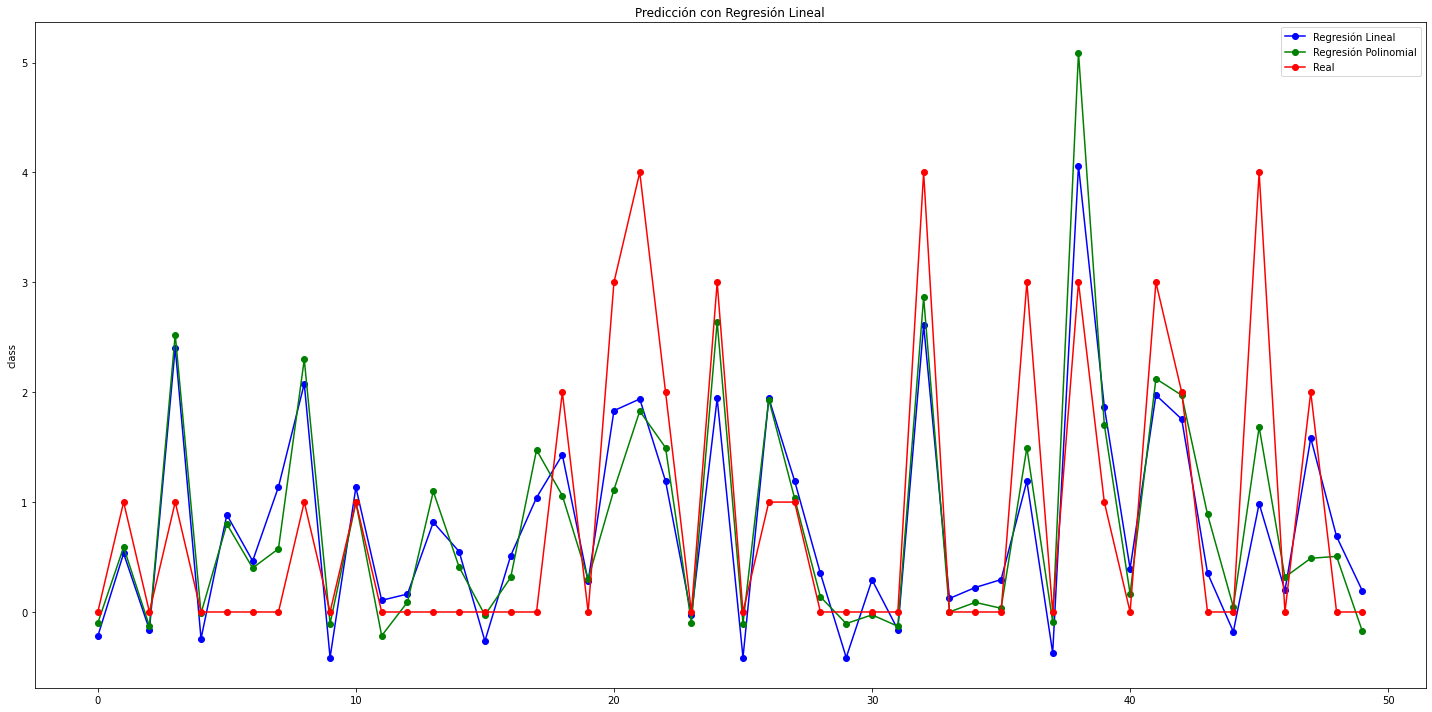

In [ ]:
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111)
xvals = list(range(len(Y_test[:50])))
ax.plot(xvals, y_prediction_lineal[:50],'bo-', label='Regresión Lineal')
ax.plot(xvals, y_prediction_poly[:50],'go-', label='Regresión Polinomial')
ax.plot(xvals, Y_test[:50],'ro-', label='Real')

ax.set(title='Predicción con Regresión Lineal',ylabel=Y_test.name)
ax.legend()

plt.tight_layout()
plt.show()

Concluimos que el modelo puede mejorar por lo que se probaran otras alternativas para la construcción del modelo

### **5. Otros Modelos**
Vamos a probar entenar el modelo con una regresión logística. Para optimizar el proceso de contrucción del modelo decidimos crear un pipeline para el procesamiento de los datos, ya que estos deben tener el formato correcto antes de pasar al entrenamiento. Por el momento, escogeremos arbitrariamente los hiperparametros del procesamiento de datos.

In [ ]:
estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('encoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>))],
         verbose=False)

In [ ]:
X_mod = pipe.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()

cp  restecg  oldpeak  slope   ca  thal
0  2.0      0.0      0.0    1.0  0.0   0.0
1  0.0      0.0      8.0    0.0  0.0   0.0
2  0.0      0.0     16.0    0.0  2.0   0.0
3  1.0      2.0     16.0    1.0  0.0   0.0
4  2.0      0.0      0.0    0.0  0.0   0.0

# 

In [ ]:
estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ('normalize',MinMaxScaler()),
              ]
pipe2 = Pipeline(estimators)
pipe2

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('encoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('normalize', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False)

In [ ]:
X_mod = pipe2.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()

cp  restecg   oldpeak  slope        ca  thal
0  0.666667      0.0  0.000000    0.5  0.000000   0.0
1  0.000000      0.0  0.235294    0.0  0.000000   0.0
2  0.000000      0.0  0.470588    0.0  0.666667   0.0
3  0.333333      1.0  0.470588    0.5  0.000000   0.0
4  0.666667      0.0  0.000000    0.0  0.000000   0.0

### **5.1 Modelamiento**

Nos apoyamos de otro pipeline para conectar el preprocesamiento de los datos y el entrenamiento del modelo 

In [ ]:
estimators = [('preprocessing', pipe),
              ('clf',LogisticRegression(solver='liblinear')),
              ]
model = Pipeline(estimators)
model

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='most_frequent',
                                                verbose=0)),
                                 ('encoder',
                                  OrdinalEncoder(categories='auto',
                                                 dtype=<class 'numpy.float64'>))],
                          verbose=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                 

In [ ]:
model.fit(X,Y)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='most_frequent',
                                                verbose=0)),
                                 ('encoder',
                                  OrdinalEncoder(categories='auto',
                                                 dtype=<class 'numpy.float64'>))],
                          verbose=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                 

In [ ]:
estimators = [('preprocessing', pipe2),
              ('clf', LogisticRegression(solver='liblinear')),
              ]
model2 = Pipeline(estimators)
model2

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='most_frequent',
                                                verbose=0)),
                                 ('encoder',
                                  OrdinalEncoder(categories='auto',
                                                 dtype=<class 'numpy.float64'>)),
                                 ('normalize',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1)))],
                          verbose=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,

In [ ]:
model2.fit(X,Y)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('imputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='most_frequent',
                                                verbose=0)),
                                 ('encoder',
                                  OrdinalEncoder(categories='auto',
                                                 dtype=<class 'numpy.float64'>)),
                                 ('normalize',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1)))],
                          verbose=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,

Queremos obtener una matriz de confusión del modelo de clasificación para observar como se esta comportando con esos hiperparametros.

In [ ]:
pred1 = model.predict(X)
display(pred1)
pred2 = model2.predict(X) 
display(pred2)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 2, 0,
       0, 0, 0, 2, 0, 3, 0, 2, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 2, 2, 0, 0,
       1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 1, 2, 0,
       0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 2, 0, 0,
       1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

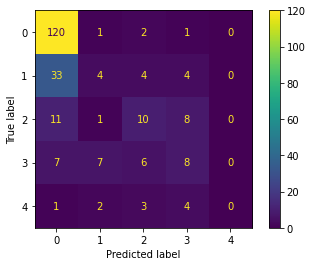

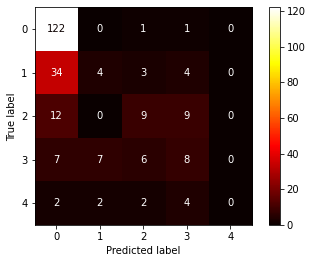

In [ ]:
plot_confusion_matrix(model,X,Y,values_format='d')

plot_confusion_matrix(model2,X,Y,values_format='d',cmap='hot')

In [ ]:
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred1))
print('----------Reporte para el Modelo 2----------')
print(classification_report(Y,pred2))

----------Reporte para el Modelo 1----------
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       124
           1       0.27      0.09      0.13        45
           2       0.40      0.33      0.36        30
           3       0.32      0.29      0.30        28
           4       0.00      0.00      0.00        10

    accuracy                           0.60       237
   macro avg       0.34      0.34      0.32       237
weighted avg       0.50      0.60      0.53       237

----------Reporte para el Modelo 2----------
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       124
           1       0.31      0.09      0.14        45
           2       0.43      0.30      0.35        30
           3       0.31      0.29      0.30        28
           4       0.00      0.00      0.00        10

    accuracy                           0.60       237
   macro avg       0.35      0.33      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### **5.2 Hiperparámetros**
Las metricas pueden mejorar por lo que decidimos hacer una validación cruzada para los valores de los hiperparametros buscando mejorar la calidad del modelo.

In [ ]:
ct = ColumnTransformer([
       ('num', SimpleImputer(strategy='mean'), make_column_selector(dtype_include=np.number)),
       ('cat', SimpleImputer(strategy='most_frequent'), make_column_selector(dtype_include=np.number))])

estimators = [('imputer', ct), 
              ('encoder', OrdinalEncoder()),
              ('normalize',MaxAbsScaler()),
              ('clf', LogisticRegression(solver='liblinear')),
              ]
pipe = Pipeline(estimators)

param_grid = dict(imputer__num__strategy=['mean', 'median'],
                  imputer__cat__strategy=['most_frequent', 'constant'],
                  encoder=[LabelEncoder(), OneHotEncoder(handle_unknown='ignore')],
                  normalize=['passthrough', MaxAbsScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=0,scoring='accuracy')

grid_search.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit_transform() takes 2 positional arguments but 3 were given


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit_transform() takes 2 positional arguments but 3 were given


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit_transform() takes 2 positional arguments but 3 were given


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         SimpleImputer(add_indicator=False,
                                                                                       copy=True,
                                                                                       fill_value=None,
                                                                                       missing_values=nan,
                                                            

In [ ]:
print(grid_search.best_params_)

{'encoder': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True), 'imputer__cat__strategy': 'most_frequent', 'imputer__num__strategy': 'mean', 'normalize': 'passthrough'}


In [ ]:
resultados = pd.DataFrame(grid_search.cv_results_)
display(resultados)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.013592      0.001063  ...             NaN                9
1        0.009124      0.000300  ...             NaN               10
2        0.010366      0.000809  ...             NaN               11
3        0.011499      0.002037  ...             NaN               12
4        0.010047      0.000490  ...             NaN               13
5        0.009880      0.000557  ...             NaN               14
6        0.012904      0.003165  ...             NaN               15
7        0.010302      0.001361  ...             NaN               16
8        0.015246      0.001113  ...        0.046538                1
9        0.017243      0.003109  ...        0.046538                1
10       0.014837      0.001292  ...        0.046538                1
11       0.017102      0.003414  ...        0.046538                1
12       0.014659      0.002023  ...        0.046538                1
13       0.014078      0.000980  ...        0.046538                1
14       0.012740      0.000441  ...        0.046538                1
15       0.014471      0.001463  ...        0.046538                1

[16 rows x 17 columns]

In [ ]:
from joblib import dump, load
dump(grid_search.best_estimator_, 'my_model.joblib') 

model = load('my_model.joblib') 

pred1 = model.predict(X)
print('----------Reporte para el Mejor Modelo----------')
print(classification_report(Y,pred1))

----------Reporte para el Mejor Modelo----------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       124
           1       0.44      0.27      0.33        45
           2       0.59      0.53      0.56        30
           3       0.69      0.64      0.67        28
           4       1.00      0.60      0.75        10

    accuracy                           0.73       237
   macro avg       0.70      0.60      0.64       237
weighted avg       0.70      0.73      0.70       237



Observamos que en comparación con los hiperparametros arbitrarios, la validación cruzada para encontrar los mejores valores de estos nos entregó mejores resultados para nuestras metricas. 

### **5.3 Validación**
Relizamos la validación con nuestros datos test

In [ ]:
X_test = test[['cp', 'restecg', 'oldpeak', 'slope', 'ca', 'thal']]
Y_test = test['class']
X_test.head()

cp  restecg  oldpeak  slope   ca  thal
169  2.0      0.0      0.0    2.0  0.0   3.0
214  4.0      0.0      0.0    1.0  1.0   3.0
63   3.0      0.0      0.0    1.0  0.0   3.0
155  4.0      2.0      2.4    2.0  3.0   3.0
5    2.0      0.0      0.8    1.0  0.0   3.0

In [ ]:
y_pred=model.predict(X_test)

print('----------Reporte para el Mejor Modelo con datos nuevos----------')
print(classification_report(Y_test,y_pred))

----------Reporte para el Mejor Modelo con datos nuevos----------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.25      0.11      0.15         9
           2       0.20      0.20      0.20         5
           3       0.50      0.57      0.53         7
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.35      0.37      0.35        60
weighted avg       0.60      0.67      0.63        60



Observamos que nuestra metrica de recall es muy buena sobre la de precisión. Esto es muy favorable ya que para la detección de enfermedades cardiovasculares nos interesa que no existan falsos negativos y las personas con esta enfermedad puedan recibir tratamiento. Realizamos una grafica para observar el rendimiento del modelo.

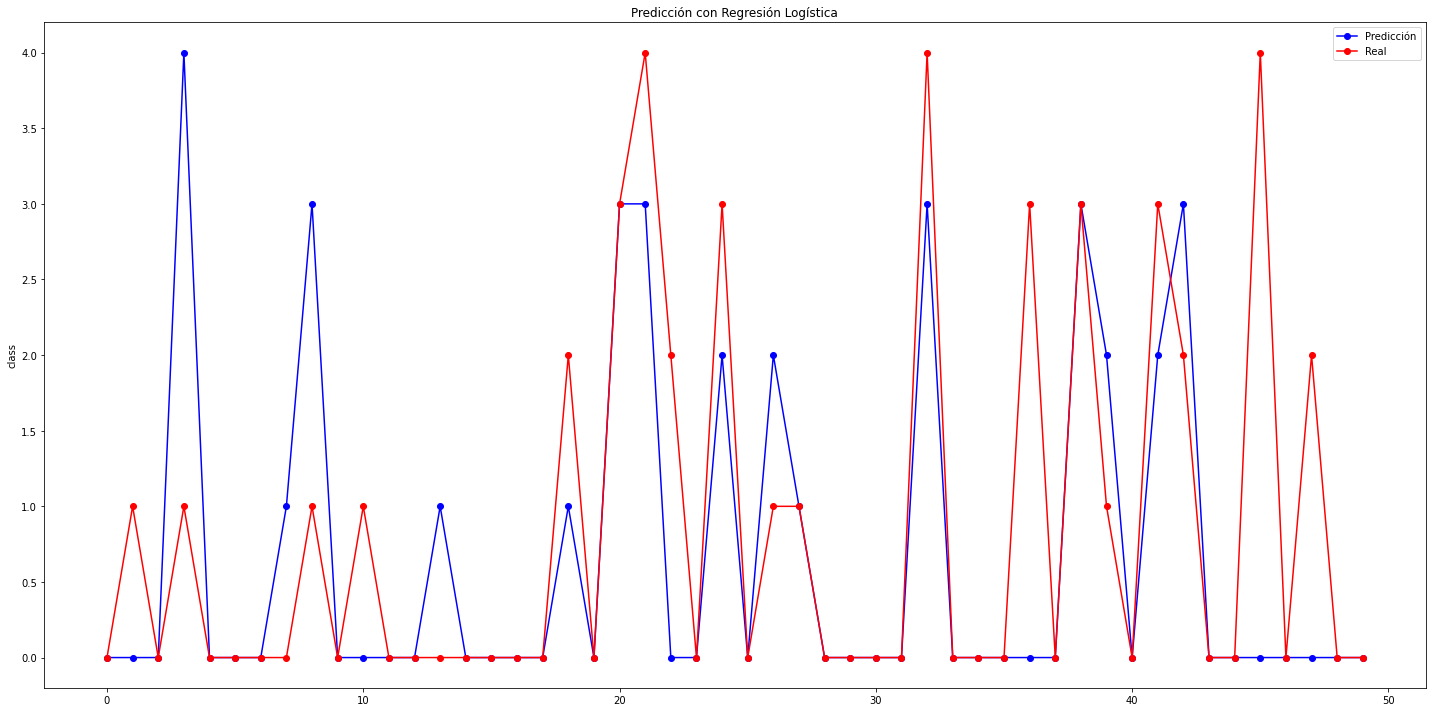

In [ ]:
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111)
xvals = list(range(len(Y_test[:50])))
ax.plot(xvals, y_pred[:50],'bo-', label='Predicción')
ax.plot(xvals, Y_test[:50],'ro-', label='Real')

ax.set(title='Predicción con Regresión Logística',ylabel=Y_test.name)
ax.legend()

plt.tight_layout()
plt.show()